In [4]:
def VGGUpdate(input_tensor = None, classes = 2):

    img_rows,img_cols = 300,300
    img_channels = 3

    img_dim = (img_rows,img_cols, img_channels)
    img_input = Input(shape = img_dim)

#Block 1
    x = Conv2D(64,(3,3), activation = 'relu', padding = 'same')(img_input)
    x = Conv2D(64,(3,3), activation = 'relu', padding = 'same')(x)
    x = MaxPooling2D((2,2), strides =(2,2))(x)


    x = Conv2D(128,(3,3), activation = 'relu', padding = 'same')(x)
    x = Conv2D(128,(3,3), activation = 'relu', padding = 'same')(x)
    x = MaxPooling2D((2,2), strides =(2,2))(x)


    x = Conv2D(256,(3,3), activation = 'relu', padding = 'same')(x)
    x = Conv2D(256,(3,3), activation = 'relu', padding = 'same')(x)
    x = Conv2D(256,(3,3), activation = 'relu', padding = 'same')(x)
    x = MaxPooling2D((2,2), strides =(2,2))(x)


    x = Conv2D(512,(3,3), activation = 'relu', padding = 'same')(x)
    x = Conv2D(512,(3,3), activation = 'relu', padding = 'same')(x)
    x = Conv2D(512,(3,3), activation = 'relu', padding = 'same')(x)
    x = MaxPooling2D((2,2), strides =(2,2))(x)


    x = Conv2D(512,(3,3), activation = 'relu', padding = 'same')(x)
    x = Conv2D(512,(3,3), activation = 'relu', padding = 'same')(x)
    x = Conv2D(512,(3,3), activation = 'relu', padding = 'same')(x)
    x = MaxPooling2D((2,2), strides =(2,2))(x)


#classification
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation = 'relu', name='fc1')(x)
    x = Dense(4096, activation = 'relu', name='fc2')(x)
    x = Dense(classes, activation = 'softmax',name='predictions')(x)


    model = Model(inputs = img_input, outputs = x, name = 'VGGdemo')

    return model


In [4]:
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [5]:
trainData = ImageDataGenerator()
tarin_data = trainData.flow_from_directory(directory = 'C:/Users/MD SANOWAR HOSSAIN/Downloads/archive/asl_alphabet_train', target_size = (224,224))


testData = ImageDataGenerator()
test_data = testData.flow_from_directory(directory ='C:/Users/MD SANOWAR HOSSAIN/Downloads/archive/asl_alphabet_test',target_size = (224,224))


#VGG = keras.applications.VGG16(input_shape = (224,224,3), include_top=False, weights = 'imagenet')
#VGG.tarinable = False

model = keras.Sequential([
    
   # VGG,
    keras.Input(shape=(224,224,3)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units = 256,activation='relu'),
    keras.layers.Dense(units = 256,activation='relu'),
    keras.layers.Dense(units = 2,activation='softmax'),
    
])

model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

hist = model.fit_generator(steps_per_epoch=100, generator=tarin_data, validation_data = test_data, validation_steps=10, epochs = 5)
model.save('sunny.h5')




Found 87000 images belonging to 1 classes.
Found 28 images belonging to 1 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               38535424  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 38,601,730
Trainable params: 38,601,730
Non-trainable params: 0
_________________________________________________________________


E:\anaconda\lib\site-packages\keras\engine\training.py:1977: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 107s 1s/step - loss: 164585.7344 - accuracy: 0.4994 - val_loss: 107946.2891 - val_accuracy: 1.0000
Epoch 2/5
100/100 [==============================] - 93s 927ms/step - loss: 2517979.0000 - accuracy: 0.5100
Epoch 3/5
100/100 [==============================] - 90s 905ms/step - loss: 10183697.0000 - accuracy: 0.5000
Epoch 4/5
100/100 [==============================] - 86s 860ms/step - loss: 19266658.0000 - accuracy: 0.5200
Epoch 5/5
100/100 [==============================] - 87s 867ms/step - loss: 52525920.0000 - accuracy: 0.5000


E:\anaconda\lib\site-packages\keras\engine\training.py:1977: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 68s 682ms/step - loss: 153319392.0000 - accuracy: 0.5100 - val_loss: 320246336.0000 - val_accuracy: 0.0000e+00
Epoch 2/5
100/100 [==============================] - 68s 676ms/step - loss: 213648688.0000 - accuracy: 0.5113
Epoch 3/5
100/100 [==============================] - 82s 819ms/step - loss: 230560400.0000 - accuracy: 0.4900
Epoch 4/5
100/100 [==============================] - 68s 678ms/step - loss: 247302784.0000 - accuracy: 0.5000
Epoch 5/5
100/100 [==============================] - 68s 682ms/step - loss: 257867168.0000 - accuracy: 0.5000


KeyError: 'Val_Accuracy'

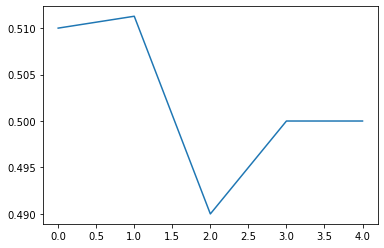

In [7]:
hist = model.fit_generator(steps_per_epoch=100, generator=tarin_data, validation_data = test_data, validation_steps=10, epochs = 5)
model.save('sunny.h5')

import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["Val_Accuracy"])
plt.plot(hist.history["Loss"])
plt.plot(hist.history["Val_loss"])
plt.title("Model Accuracy")
plt.ylable("Accuracy")
plt.xlable("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()
